In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # ÏòàÏãú: ÎßëÏùÄ Í≥†ÎîïÏúºÎ°ú ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω Ïãú)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©.csv") # ÎãπÎá® ÏπòÎ£å

Í≥†ÌòàÏïïÏù∏Îç∞ Í≥†ÌòàÏïï Í¥ÄÎ¶¨ Ïïà Ìïú ÏÇ¨Îûå ÌäπÏßï ÌôïÏù∏

In [16]:
# Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ ÎòêÎäî Í≥†ÌòàÏïïÏù¥Î©¥ÏÑú ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÎßå ÎÇ®ÍπÄ
data = data[(data['HE_HP'].isin([3, 4])) & (data['DI1_pt'] == 0)]

In [ ]:
# Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ ÎòêÎäî Í≥†ÌòàÏïïÏù¥Î©¥ÏÑú ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÎßå ÎÇ®ÍπÄ
#data = data[(data['HE_DM_HbA1c'].isin([2, 3])) & (data['DE1_3'] == 2)]

In [10]:
data.info

<bound method DataFrame.info of                 mod_d             id       ID_fam    year  region  town_t  \
117     b'2022.03.08'  b'A110963502'  b'A1109635'  2012.0     1.0     1.0   
124     b'2022.03.08'  b'A110967702'  b'A1109677'  2012.0     1.0     1.0   
239     b'2022.03.08'  b'A112980901'  b'A1129809'  2012.0     1.0     1.0   
358     b'2022.03.08'  b'A115980303'  b'A1159803'  2012.0     1.0     1.0   
406     b'2022.03.08'  b'A117966901'  b'A1179669'  2012.0     1.0     1.0   
...               ...            ...          ...     ...     ...     ...   
83849  b'2024.01.11.'            NaN  b'YP015742'  2022.0    17.0     2.0   
83867  b'2024.01.11.'            NaN  b'YP132325'  2022.0    17.0     1.0   
83965  b'2024.01.11.'            NaN  b'YP384225'  2022.0    17.0     1.0   
84004  b'2024.01.11.'            NaN  b'YR133942'  2022.0     8.0     2.0   
84031  b'2024.01.11.'            NaN  b'YR137036'  2022.0     8.0     2.0   

       apt_t      psu  sex   age  age_month

In [17]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
    'DI1_pt'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]


In [18]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

In [20]:
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data



DE1_dg missing ratio: 0.0
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 64.6
Median for HE_ht: 164.4
Median for HE_BMI: 24.615231827515593


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


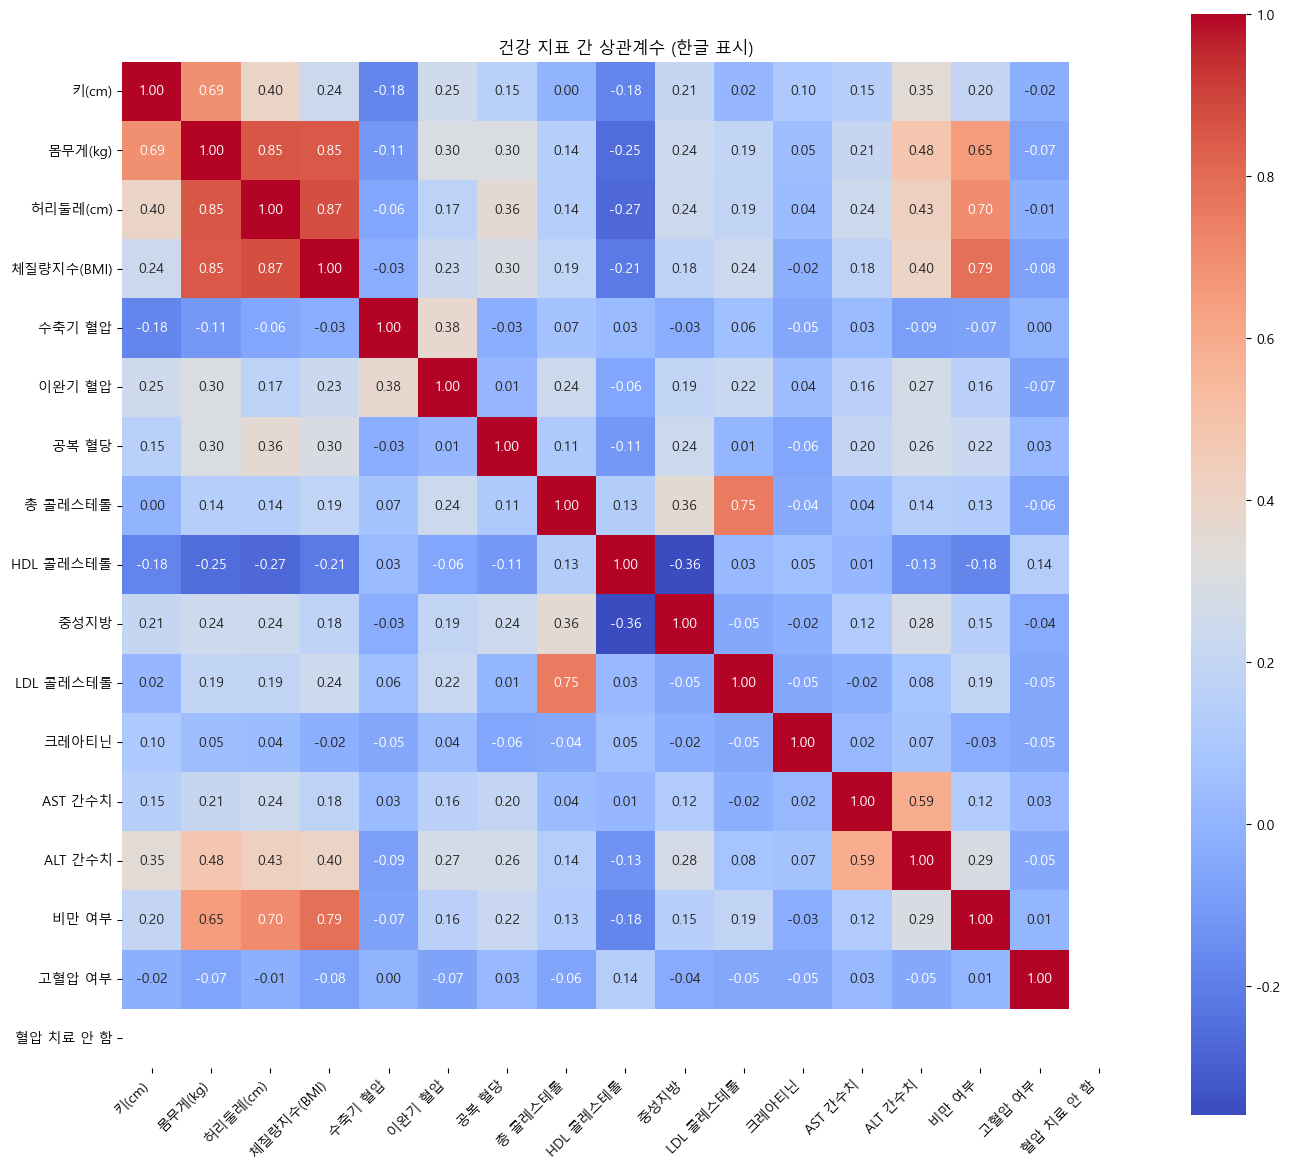

In [23]:
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä',
    'DI1_pt' : 'ÌòàÏïï ÏπòÎ£å Ïïà Ìï®'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DE1_3', 'DI1_pt'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Î≥¥Í≥† Ïã∂ÏùÄ Î≥ÄÏàòÎßå Ï∂îÏ∂ú
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌïúÍ∏Ä ÌëúÏãú)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - Í≥†ÌòàÏïï


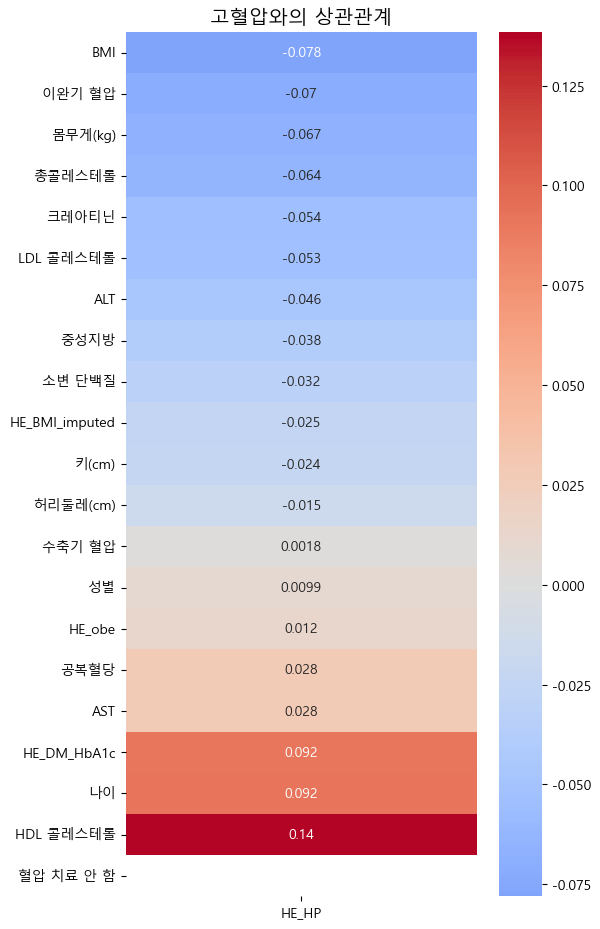

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë ÏÇ¨Ï†Ñ
feature_name_ko = {
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±Ïßà', 'HE_glu': 'Í≥µÎ≥µÌòàÎãπ', 'HE_chol': 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': 'ÏÑ±Î≥Ñ', 'age': 'ÎÇòÏù¥',
    'DI1_pt' : 'ÌòàÏïï ÏπòÎ£å Ïïà Ìï®'
}

# ÌÉÄÍ≤ü Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë
target_name_ko = {

    'HE_HP': 'Í≥†ÌòàÏïï'
}

# Ï†úÏô∏Ìï† Ïª¨Îüº
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features ÏûêÎèô ÏßÄÏ†ï
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - {target_name_ko[target]}")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # ÌïúÍ∏Ä ÎùºÎ≤®Î°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=14)
    plt.tight_layout()
    plt.show()


Í≥†ÌòàÏïïÏù∏Îç∞ ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÏùÑ ÎìúÎûç

In [51]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2022ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©.csv") # ÎãπÎá® ÏπòÎ£å

In [52]:
# Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ ÎòêÎäî Í≥†ÌòàÏïïÏù¥Î©¥ÏÑú ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÎßå Î≤ÑÎ¶º
data = data[~((data['HE_HP'].isin([3, 4])) & (data['DI1_pt'] == 0))]

In [53]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
    'DI1_pt'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]

In [54]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data



DE1_dg missing ratio: 0.05705428954423593
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.2
Median for HE_ht: 162.5
Median for HE_BMI: 23.66419796690986


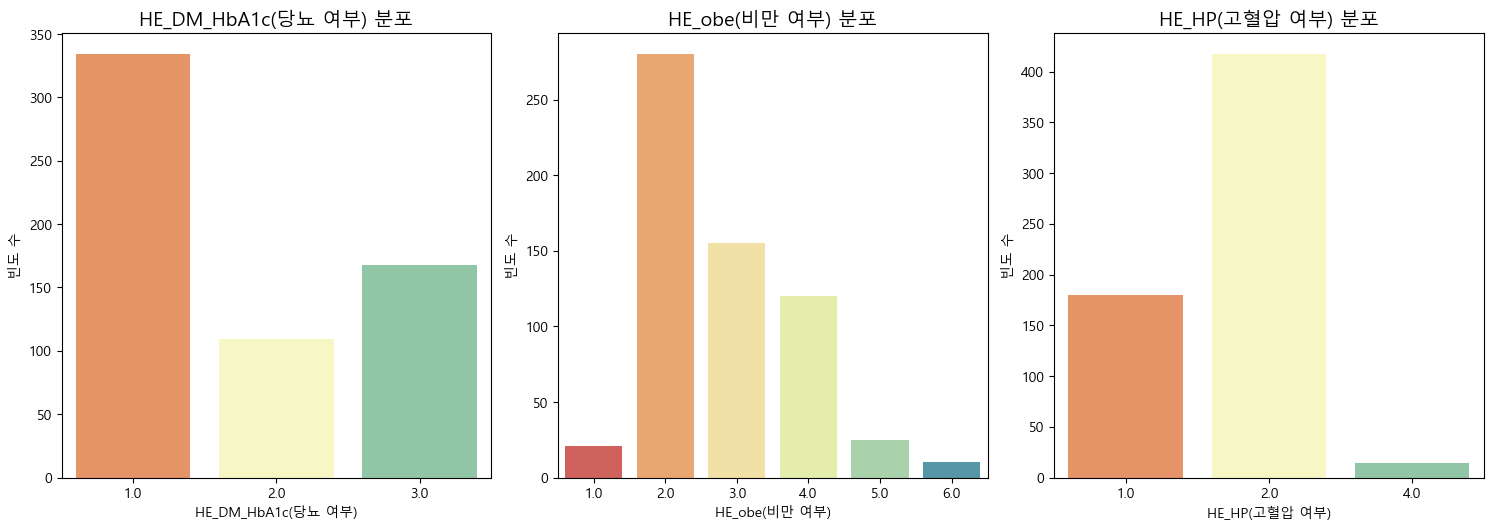

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [55]:
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä',
    'DI1_pt' : 'Í≥†ÌòàÏïï ÏπòÎ£å Ïïà Ìï®'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DI1_pt'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Î≥¥Í≥† Ïã∂ÏùÄ Î≥ÄÏàòÎßå Ï∂îÏ∂ú
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌïúÍ∏Ä ÌëúÏãú)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - Í≥†ÌòàÏïïÏïï


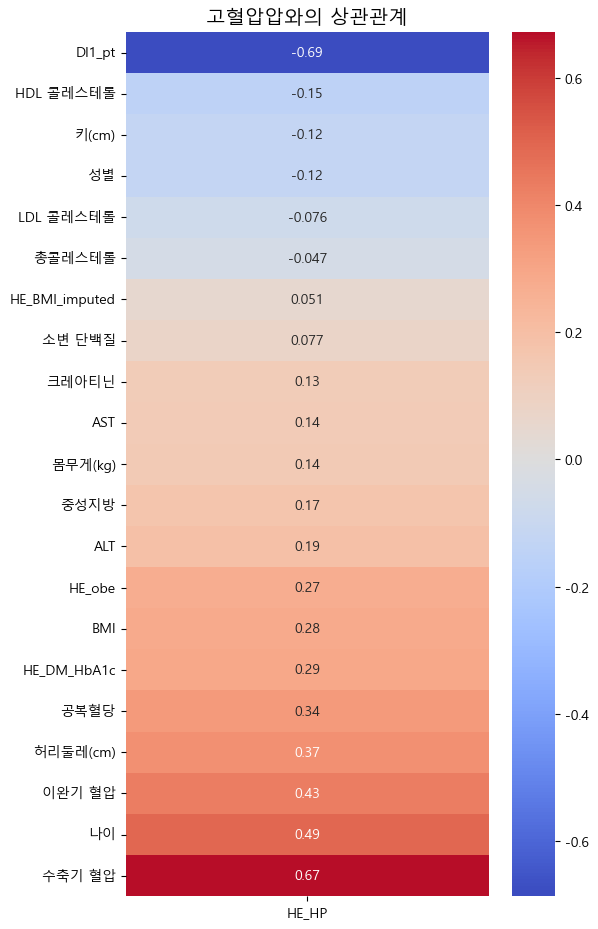

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë ÏÇ¨Ï†Ñ
feature_name_ko = {
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±Ïßà', 'HE_glu': 'Í≥µÎ≥µÌòàÎãπ', 'HE_chol': 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': 'ÏÑ±Î≥Ñ', 'age': 'ÎÇòÏù¥',
    'DE1_3' : 'ÎãπÎá®Îá® ÏπòÎ£å Ïïà Ìï®'
}

# ÌÉÄÍ≤ü Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë
target_name_ko = {

    'HE_HP': 'Í≥†ÌòàÏïïÏïï'
}

# Ï†úÏô∏Ìï† Ïª¨Îüº
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features ÏûêÎèô ÏßÄÏ†ï
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - {target_name_ko[target]}")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # ÌïúÍ∏Ä ÎùºÎ≤®Î°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=14)
    plt.tight_layout()
    plt.show()


Í∞ÄÏÑ§ : Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Í≥†ÌòàÏïïÏù∏Îç∞ Í≥†ÌòàÏïï ÏïïÏπòÎ£åÌïú ÏÇ¨ÎûåÏùò ÏàòÏπòÍ∞Ä Íª¥ÏûàÏñ¥ Î≥ÄÏàòÎì§Í∞ÑÏóê ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î∞©Ìï¥ÌïúÎã§. ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥Îãà Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Îã§Î•ºÍ≤ÉÏù¥ ÏóÜÎã§.

ÎãπÎá®Ïù∏Îç∞ ÎãπÎá® Í¥ÄÎ¶¨ Ïïà Ìïú ÏÇ¨Îûå ÌäπÏßï Î≥¥Í∏∞

In [30]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2022ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©.csv") # ÎãπÎá® ÏπòÎ£å

In [ ]:
# ÎãπÎá®Îá® Ï†ÑÎã®Í≥Ñ ÎòêÎäî ÎãπÎá®Ïù¥Î©¥ÏÑú ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÎßå ÎÇ®ÍπÄ
data = data[(data['HE_DM_HbA1c'].isin([2, 3])) & (data['DE1_3'] == 2)]

In [32]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
    'DE1_3'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]

In [33]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data



DE1_dg missing ratio: 0.0
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 66.95
Median for HE_ht: 165.45
Median for HE_BMI: 24.470036673882998


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Í≤∞Í≥º : Í≤ΩÍ≥ÑÌòï ÎãπÎá®Ïù∏ ÏÇ¨ÎûåÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÏπòÎ£åÎ•º ÌïòÍ≥† ÏûàÎçîÎùºÎäî Îúª

ÎãπÎá®Ïù∏Îç∞ ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÏùÑ ÎìúÎûç

In [35]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2022ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©.csv") # ÎãπÎá® ÏπòÎ£å

In [36]:
# ÎãπÎá®Î≥ëÏù¥Í±∞ÎÇò Ï†ÑÎã®Í≥ÑÏù∏Îç∞ ÏπòÎ£åÎ•º ÌïòÍ≥† ÏûàÎäî ÏÇ¨ÎûåÏùÄ Ï†úÍ±∞
data = data[~((data['HE_DM_HbA1c'].isin([2, 3])) & (data['DE1_3'] == 1))]

In [37]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
    'DE1_3'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]

In [38]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data



DE1_dg missing ratio: 0.05828055847617185
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.1
Median for HE_ht: 162.6
Median for HE_BMI: 23.61548947203167


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [40]:
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä',
    'DE1_3' : 'ÎãπÎá®Îá® ÏπòÎ£å Ïïà Ìï®'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DE1_3'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Î≥¥Í≥† Ïã∂ÏùÄ Î≥ÄÏàòÎßå Ï∂îÏ∂ú
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌïúÍ∏Ä ÌëúÏãú)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë ÏÇ¨Ï†Ñ
feature_name_ko = {
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±Ïßà', 'HE_glu': 'Í≥µÎ≥µÌòàÎãπ', 'HE_chol': 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': 'ÏÑ±Î≥Ñ', 'age': 'ÎÇòÏù¥',
    'DE1_3' : 'ÎãπÎá®Îá® ÏπòÎ£å Ïïà Ìï®'
}

# ÌÉÄÍ≤ü Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë
target_name_ko = {

    'HE_DM_HbA1c': 'ÎãπÎá®Î≥ë'
}

# Ï†úÏô∏Ìï† Ïª¨Îüº
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features ÏûêÎèô ÏßÄÏ†ï
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - {target_name_ko[target]}")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # ÌïúÍ∏Ä ÎùºÎ≤®Î°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=14)
    plt.tight_layout()
    plt.show()


üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - ÎãπÎá®Î≥ë


Í∞ÄÏÑ§ : Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî ÎãπÎá®Ïù∏Îç∞ ÎãπÎá®Îá®ÏπòÎ£åÌïú ÏÇ¨ÎûåÏùò ÏàòÏπòÍ∞Ä Íª¥ÏûàÏñ¥ Î≥ÄÏàòÎì§Í∞ÑÏóê ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î∞©Ìï¥ÌïúÎã§. ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥Îãà Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Îã§Î•ºÍ≤ÉÏù¥ ÏóÜÎã§.